In [59]:
import os
import numpy as np
import pandas as pd
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torch import nn
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [42]:
dataroot = './Data/AnimeFace'
workers = 3
batch_size = 128
image_size = 64
nc = 3

transform = transforms.Compose([transforms.Resize(image_size),
                                transforms.CenterCrop(image_size),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                                transforms.ToTensor()])

In [43]:
#dataset = datasets.ImageFolder(root=dataroot, transform=transform)

In [44]:
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
#                                          shuffle=True, num_workers=workers)

In [53]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [54]:
# real_batch = iter(dataloader)
# plt.figure(figsize=(10,10))
# plt.title('Train Images')
# plt.imshow(np.transpose(torchvision.utils.make_grid(real_batch[0].to(device)[:64],
#                                         padding=2,normalize=True).cpu(),
#                        (1,2,0)))

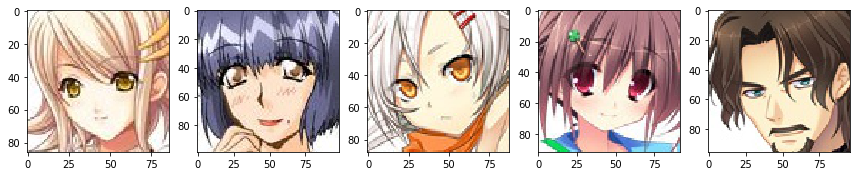

In [51]:
plt.figure(figsize=(30,30))

for i in range(5):
    file = np.random.choice(os.listdir(dataroot))
    image_path= os.path.join(dataroot, file)
    image=mpimg.imread(image_path)
    plt.subplot(1,10,i+1)
    plt.imshow(image)

In [56]:
nz= 64
noise = torch.randn(64, nz,1,1)

In [62]:
ngf = 64
nc = 3
nz = 100

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            # input is noise, going into a convolution
            # Transpose 2D conv layer 1.
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            # Resulting state size - (ngf*8) x 4 x 4 i.e. if ngf= 64 the size is 512 maps of 4x4

            # Transpose 2D conv layer 2.
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            # Resulting state size -(ngf*4) x 8 x 8 i.e 8x8 maps

            # Transpose 2D conv layer 3.
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # Resulting state size. (ngf*2) x 16 x 16

            # Transpose 2D conv layer 4.
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # Resulting state size. (ngf) x 32 x 32

            # Final Transpose 2D conv layer 5 to generate final image.
            # nc is number of channels - 3 for 3 image channel
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),

            # Tanh activation to get final normalized image
            nn.Tanh()
            # Resulting state size. (nc) x 64 x 64
        )

    def forward(self, input):
        
        return self.main(input)

In [61]:
# Create the generator
netG = Generator(ngpu).to(device)

# Handle multi-gpu if desired
if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

# Print the model
print(netG)

NameError: name 'ngpu' is not defined

In [63]:
class Discriminator(nn.Module):
    
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        
        self.main = nn.Sequential(
        
            nn.Conv2d(3, 64)
        )

SyntaxError: unexpected EOF while parsing (<ipython-input-63-ca78f2c4ad19>, line 1)